# Linear Regression vs. LASSO

This notebook demonstrate the performances of the ordinal least squares (OLS) linear model and the least absolute shrinkage and selection operator (LASSO) model. Let $\hat{y}$ be the predicted value, we have the following liner asumption.

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

Although both two models assume the linear relation between the input and output, they minimize different loss functions. 

Linear Model minimizes
$$
\sum \big(y-\hat{y} \big)^2.
$$

LASSO minimizes
$$
\sum \bigg(y-\hat{y} \bigg)^2 +  \alpha \bigg( |w_1|+|w_2| \bigg).
$$

### 1. The effect of alpha in LASSO

 - LASSO has hyperparameter $\alpha$.  A large $\alpha$ shrinks the coefficients to zeros quicklier.

 - In the following codes, change the value of $\alpha$ to see the change of the slope of the two models. 

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


#### Example 1

In [1]:
def lasso_plot(alpha=10, legend=True):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    np.random.seed(0)
    # Create a dataset
    x = 30 * np.random.random((20, 1))
    y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)
    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = model.predict(x_new[:, np.newaxis])
    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)
    # predict y from the data
    y_new1 = model1.predict(x_new[:, np.newaxis])
    # plot the results
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)
    ax.plot(x_new, y_new1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('tight')
    s1 = np.round(model.coef_[0][0], 3)
    s2 = np.round(model1.coef_[0], 3)
    if(legend):
        plt.legend(['Linear Model. Slope =' + str(s1), 'LASSO Model. Slope ='+ str(s2)], loc='upper left')
    plt.savefig('lasso'+str(alpha)+'.png', dpi=300)
    plt.show()
    from tabulate import tabulate
    import pandas as pd
    d = np.concatenate((x,y), axis=1)
    d = pd.DataFrame(d, columns= ['x','y'])

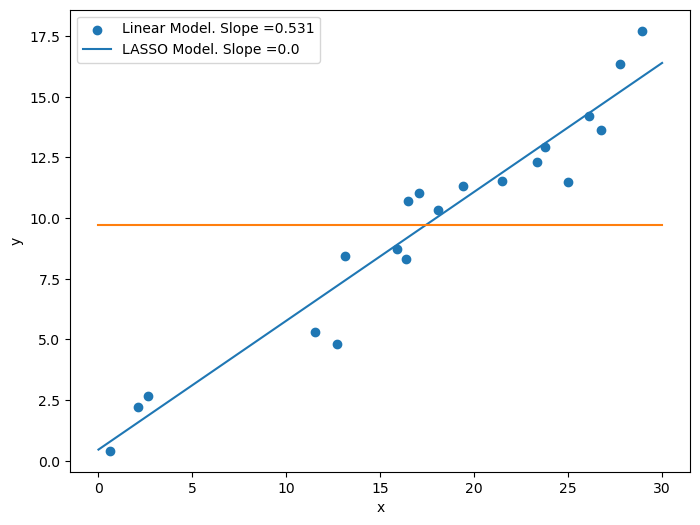

In [2]:
lasso_plot(alpha=50, legend=True)

#### Example 2

In [3]:
def lasso_coef(size=100, coef=[1, 5, 10, 7, 9], alpha=1):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    dim = [size, len(coef)]
    np.random.seed(0)
    x = np.random.random(dim)
    y = x.dot(coef) + np.random.normal(0, 1, size)
    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)
    from tabulate import tabulate
    s1 = model.coef_
    s2 = model1.coef_
    s = np.vstack((coef, s1, s2))
    import pandas as pd
    s = pd.DataFrame(s, index=["Truth",'Linear Model','LASSO'])
    headers = ['w' + str(i) for i in range(1,len(coef)+1)]
    print(tabulate(s, headers=headers, tablefmt="fancy_grid"))

In [26]:
#elastic(alpha=.05, coef=[0, 0, 4, 3, 0, 1, 0, 3, 0 , 6, 0, 0, 0, 5, 1])
lasso_coef(alpha=.4, coef=[0, 4, 0, 3, 0, 7])

╒══════════════╤═══════════╤═════════╤═══════════╤════════╤═══════════╤═════════╕
│              │        w1 │      w2 │        w3 │     w4 │        w5 │      w6 │
╞══════════════╪═══════════╪═════════╪═══════════╪════════╪═══════════╪═════════╡
│ Truth        │  0        │ 4       │  0        │ 3      │ 0         │ 7       │
├──────────────┼───────────┼─────────┼───────────┼────────┼───────────┼─────────┤
│ Linear Model │ -0.244061 │ 3.54013 │  0.221939 │ 2.6042 │ 0.0982158 │ 6.83617 │
├──────────────┼───────────┼─────────┼───────────┼────────┼───────────┼─────────┤
│ LASSO        │ -0        │ 0       │ -0        │ 0      │ 0         │ 2.74058 │
╘══════════════╧═══════════╧═════════╧═══════════╧════════╧═══════════╧═════════╛


### 2. Titanic Data

We want to predict the ages of passengers on the titanic data. 

In [14]:
import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')

df = df[df['Age'].notna()]

# Assign input variables
X = df.loc[:,['Pclass','Sex','Fare','Embarked','SibSp','Parch','Survived']]

# Assign target variable
y = df['Age']

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)
X['Survived'] = X['Survived'].astype(object)
# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))

Rsquared on Testing:  0.23604182193276024


In [15]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=.01)
model.fit(x_train, y_train)
print(r2_score(y_test, model.predict(x_test)))

0.2353979123677924


### 4.  Practice

A. Download an NBA dataset at this [link](https://bryantstats.github.io/math460/data/nba_salary2.csv). Use the salary variable as the target. Don't use the following variables as input: 'Player','Salary','NBA_DraftNumber','NBA_Country','Tm'

 - Split the data 80:20 for training and testing
 - Calculate the testing Rsquared of linear model and show the coefficients of the models
 - Calculate the testing Rsquared of LASSO model with alpha =  1.  Show the coefficients of the LASSO.  Do you observe any variables no longer has effect in the LASSO model?
 - Change the value of alpha in the LASSO and observe the Rsquared of LASSO.  Give your comments. 
 - Plot the coefficients of linear model and LASSO. 


B. Redo part A on a different dataset. 